## Analysing DNA sequences

This notebook contains my notes on the lectures of the MOOC [ Algorithms for DNA Sequencing](https://www.coursera.org/learn/dna-sequencing/#syllabus) 

### Checking the longest common prefix in DNA string

In [1]:
def longestCommonPrefix(s1, s2):
    i = 0
    while i < len(s1) and i < len(s2) and s1[i] == s2[i]:
        i += 1
    return s1[:i]
longestCommonPrefix('ACCATTG', 'ACCAAGTC')

'ACCA'

### Checking if sequences match

In [2]:
def match(s1, s2):
    if not len(s1) == len(s2):
        return False
    for i in range(0, len(s1)):
        if not s1[i] == s2[i]:
            return False
    return True
print (match('ACCATTG', 'ACCATTG'))
print (match('ACCAATG', 'ACCATTG'))

True
False


In [3]:
'ACCATTG' == 'ACCATTG'

True

### Manipulating dictionaries: DNA complementary bases

In [4]:
complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A'}

In [5]:
complement['A']

'T'

In [6]:
complement['C']

'G'

### DNA reverse complementary bases

In [7]:
def reverseComplement(s):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A'}
    t = ''
    for base in s:
        t = complement[base] + t
    return t
reverseComplement('ACCATTG')

'CAATGGT'

### Reading a DNA sequence of E. coli strain 52148 chromosome

In [8]:
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome
genome = readGenome('escherichia-coli-sequence.fastq')
genome

'TTGCCGCAATTGTTCACAAGCGACGTTTAACCCGTGCGCACGAAAATCCAGGTATTCCCGCGCCTGCTGCGCGTAATTCAACAGTTTATGCGCGGCAGATCGCAGAGCATACAACGAGGCGTTAGCGTAAGCGGCATGAAGCAACGCCTGAATTGGCTGGGCGAACAGCGAATCTTCCCACAACTGATCGGCAGCATGACGAATATGTTCGAGGTCCGCCAGATCGGCATGACGCCAGCGCCTGCCAAGCGCGGCATGGGCAAAATCTTCCACCCAGCGTTGTTGCTCTGGCGGTGGTAACTTACCGTTGTTGGCTAACTCATAGCGCGCCCGATTCGCCAGGTAGCCCCACATCGACGACACCGGAAATATCTGCTGTGGCGTAATACAGCCTTTCATCAGCGTCCCGGAAATCAGTGCCCGCACCTGGTCGGCGTCGTCACTGTTACGATCCTGTTGATCGAACTTATTGACCAGCACGTACAGCGGCACCGATTGCCCCACCGCCAAAATCGCCTCACGGACCTCTTCATCGGAGATCGATTTCAGTTGCGTATAATCCAGCACCGCCAGTACCGCCGAGGCGCGTGCCAGCTGCTGGTTAAGCATTTTTTGCAGATGCGGTTGCCCGGCTTCATTTGGCCCGGGGGTATCCAGTAACGTCAACTGACCGGGATAACTCTCCAGCCCCGCTAGATGGACAAACTCCACTTCAATCACGGGAATATGCTCAATGGCGGCGTAAGCAGAAAAAGGAAAATCGACGTCCAGCGCCTTCGCCAGTCGCACTAAATCATTCAAACTTTTCAGACAATGAAAAATAGGCTGGGCACCCAGATAATATTTTTCGAAAGCGACGCCATTTTCGATCCGCTGCATAAGCGCACGCATATCTTTATCTATTTCCAGCACATCGGTCAGATGCTTAATATCGCAATCACGCAGGCGCTGTTGTAATTGTTGAATTAAACAATCGATTGGCGCGACATGTGAAAAATG

In [9]:
len(genome)

1246770

### Counting the number of occurences for each base

In [10]:
counts = {'A': 0, 'C': 0, 'G': 0, 'T': 0}
for base in genome:
    counts[base] += 1
print(counts)

{'A': 304181, 'C': 315878, 'G': 320332, 'T': 306379}


In [11]:
import collections
collections.Counter(genome)

Counter({'A': 304181, 'C': 315878, 'G': 320332, 'T': 306379})

### Checking base quality (Q)

In [12]:
#Reading .fastq file for human genome and separating sequences (seqs) and qualities (quals) reads in two separated lists
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline() # skip name line
            seq = fh.readline().rstrip() # read base sequence
            fh.readline() # skip placeholder line
            qual = fh.readline().rstrip() #base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities
seqs, quals = readFastq('SRR835775_1.first1000.fastq')
print(seqs[:5])    #sequences reads
print(quals[:5])   #quality reads

['TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTCACCCTAACCCTAACCCTAACCGTATCCGTCACCCTAACCCTAAC', 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACC', 'TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGG', 'TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAAGGGTTGGGGGTTAGGGGTAGGGGTAGGGTTA', 'CTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCAACCCTAACCCTAACCCTCACC']
['???B1ADDD8??BB+C?B+:AA883CEE8?C3@DDD3)?D2;DC?8?=BAD=@C@(.6.6=A?=?@##################################', 'CCCFFFFFGHHGHJJJJJIJGIIJJJJJJJIJIJJJJJFJJFGIIIIH=CBFCF=CCEG)=>EHB2@@DEC>;;?=;(=?BBD?59?BA###########', '@@<DD?DDHHH<CBHII:CFGIGAGHIIG?CCGGE0BDHIIHIGICH8=FHGI=@EHGGGEEHH>);?CC@.;(=;?59,5<A599?CB>ABBCB><88A', '@CCFFDDFHHHDFHIJJCGGIJJHIIHJC?DHHIJ0?DGHI9BBFHICGGIGI=CDEGI=?AAEF7@?################################', '@<@FDFDDBBFHH@EBGGGEH@FFHE;EHIEGGBHG?)9?8BDGGBGGBCDGI=93=C6==

### Converting ASCII symbols in quality scores (Q)

The PHRED software reads DNA sequencing trace files, calls bases, and assigns a non-negative quality value to each called base using a logged transformation of the error probability, **Q = -10 log10(Pe)**, for example:<br/>
Pe = 1.0,         Q =  0 <br/>
Pe = 0.1,         Q = 10 <br/>
Pe = 0.01,        Q = 20 <br/>
... <br/>
Pe = 0.00000001,  Q = 80 <br/>
Pe = 0.000000001, Q = 90 <br/>  
In typical raw sequence reads, the PHRED quality valuea will be from 0 to 40. In the QUAL format these quality values are held as space separated text in a FASTA like file format.  In the FASTQ format, each quality values is encoded with a single ASCI character using chr(Q+33), meaning zero maps to the character "!" and for example 80 maps to "q".  For the Sanger FASTQ standard the allowed range of PHRED scores is 0 to 93 inclusive. The sequences and quality are then stored in pairs in a FASTA like format. 
MOre info:[Bio.SeqIO.QualityIO-module](http://biopython.org/DIST/docs/api/Bio.SeqIO.QualityIO-module.html)

In [35]:
#using biopython 

from Bio import SeqIO 
for record in SeqIO.parse("SRR835775_1.first1000.fastq", "fastq"):
    print(record.letter_annotations["phred_quality"])

[30, 30, 30, 33, 16, 32, 35, 35, 35, 23, 30, 30, 33, 33, 10, 34, 30, 33, 10, 25, 32, 32, 23, 23, 18, 34, 36, 36, 23, 30, 34, 18, 31, 35, 35, 35, 18, 8, 30, 35, 17, 26, 35, 34, 30, 23, 30, 28, 33, 32, 35, 28, 31, 34, 31, 7, 13, 21, 13, 21, 28, 32, 30, 28, 30, 31, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[34, 34, 34, 37, 37, 37, 37, 37, 38, 39, 39, 38, 39, 41, 41, 41, 41, 41, 40, 41, 38, 40, 40, 41, 41, 41, 41, 41, 41, 41, 40, 41, 40, 41, 41, 41, 41, 41, 37, 41, 41, 37, 38, 40, 40, 40, 40, 39, 28, 34, 33, 37, 34, 37, 28, 34, 34, 36, 38, 8, 28, 29, 36, 39, 33, 17, 31, 31, 35, 36, 34, 29, 26, 26, 30, 28, 26, 7, 28, 30, 33, 33, 35, 30, 20, 24, 30, 33, 32, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[31, 31, 27, 35, 35, 30, 35, 35, 39, 39, 39, 27, 34, 33, 39, 40, 40, 25, 34, 37, 38, 40, 38, 32, 38, 39, 40, 40, 38, 30, 34, 34, 38, 38, 36, 15, 33, 35, 39, 40, 40, 39, 40, 38, 40, 34, 39, 23, 28, 37, 39, 38, 40, 28, 31, 36, 39, 38, 38, 38, 36, 36

In [13]:
#creating a function

def phred33ToQ(qual):
    return ord(qual) - 33
print(phred33ToQ('#'),'--> a low quality score means a low confidence in our value')
print(phred33ToQ('H'), '--> a higher quality score means a higher confidence in our value')

2 --> a low quality score means a low confidence in our value
39 --> a higher quality score means a higher confidence in our value


### Creating a histogram of quality scores

In [41]:
def createHist(qualityStrings):
    hist = [0]*42
    for read in qualityStrings:
        for phred in read:
            q = phred33ToQ(phred)
            hist[q] += 1
    return hist
h = createHist(quals)
print(h)

[0, 0, 6178, 0, 0, 54, 108, 574, 345, 83, 193, 124, 79, 165, 49, 236, 184, 327, 514, 238, 531, 254, 313, 798, 992, 888, 1396, 1488, 993, 1752, 3387, 4487, 3248, 5476, 8375, 11814, 4243, 7827, 6579, 8179, 9349, 8180]


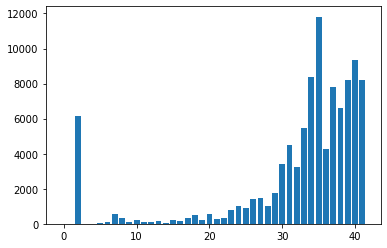

In [42]:
# Plot the histogram
%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(range(len(h)), h)
plt.show()

### Analyzing reads by position

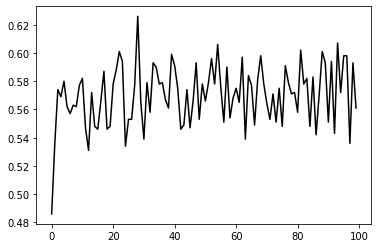

In [43]:
#Plot the GC content at each position in the reads 
#For human genome, our case, the gc content is > 0.5

def findGCByPos(reads):
    ''' Find the GC ratio at each position in the read '''
    # Keep track of the number of G/C bases and the total number of bases at each position
    gc = [0] * 100
    totals = [0] * 100
    for read in reads:
        for i in range(len(read)):
            if read[i] == 'C' or read[i] == 'G':
                gc[i] += 1
            totals[i] += 1
    # Divide G/C counts by total counts to get the average at each position
    for i in range(len(gc)):
        if totals[i] > 0:
            gc[i] /= float(totals[i])
    return gc
gc = findGCByPos(seqs)
plt.plot(range(len(gc)), gc, 'k')
plt.show()

In [44]:
import pandas as pd
gc_content = pd.DataFrame(gc) 
print(gc_content.describe())

                0
count  100.000000
mean     0.570140
std      0.021444
min      0.486000
25%      0.553000
50%      0.572000
75%      0.583250
max      0.626000


In [45]:
print('The gc content is',gc_content.mean())

The gc content is 0    0.57014
dtype: float64


In [46]:
##Checking sequences counting
count = collections.Counter()
for seq in seqs:
    count.update(seq)
print (count)

Counter({'G': 28742, 'C': 28272, 'T': 21836, 'A': 21132, 'N': 18})


Note:  N appears when when the base caller has no confidence.